##                                                            Case Study
Below is a link to a sample of fake restaurant data from Toast. It is all from one restaurant, with a few different   locations (each location has a different Restaurant Id). \nEach row is an order from the given restaurant location. I want you to analyze the data and tell me what you learned about the restaurant chain: What are the general trends? Anything interesting or surprising? Do you think this is a high or low value customer to Toast? What additional information would you like to see? Any guesses about what type of restaurant this is? Like I said, this is pretty open-ended. I really just want to see how you attack the dataset and how you think through your python. Note that any timestamps are in GMT.

#### Since Timestamps are in GMT, I converted them to EST

In [1]:
# Data Preprocessing

#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 5, 10

#### Considering only records where Order Amount is greater than zero

In [2]:
#Importing the Dataset & Creating the Pandas Dataframe
df=pd.read_csv('Case Study.csv')
df.columns = df.columns.str.replace(' ', '_') #Renaming Column Names
df=df[df["Order_Amount"]> 0] #Considering only records where Order Amount is greater than zero
count = df.count()
print(count)
print('\033[1m' '\033[4m'+"\nDataset doesn't have any Missing Values")
df.head()


Restaurant_Id              224918
Order_Payment_Id           224918
Payment_Type               224918
Payment_Status             224918
Paid_Timestamp_yyyymmdd    224918
Paiddate_Timestamp         224918
Order_Amount               224918
Tip_Amount                 224918
Server_Id                  224918
Digital_Receipt            224918
Refund_Status              224918
Deleted                    224918
dtype: int64

Dataset doesn't have any Missing Values


,Restaurant_Id,Order_Payment_Id,Payment_Type,Payment_Status,Paid_Timestamp_yyyymmdd,Paiddate_Timestamp,Order_Amount,Tip_Amount,Server_Id,Digital_Receipt,Refund_Status,Deleted
0,1232000000000000,1232001000714108,CREDIT,CAPTURED,20161113,11/13/16 4:06:18 PM,42.75,0.0,1232000000000043,t,NONE,f
1,1232000000000000,1232001000714113,CREDIT,CAPTURED,20161113,11/13/16 4:08:59 PM,4.23,0.0,1232000000000043,t,NONE,f
2,1232000000000000,1232001000714121,CREDIT,CAPTURED,20161113,11/13/16 4:25:50 PM,18.01,1.0,1232000000000044,t,NONE,f
3,1232000000000000,1232001000714126,CREDIT,CAPTURED,20161113,11/13/16 4:26:24 PM,5.55,1.0,1232000000000044,t,NONE,f
4,1232000000000000,1232001000714131,CREDIT,CAPTURED,20161113,11/13/16 4:26:53 PM,8.51,0.0,1232000000000044,t,NONE,f


## 1. Initial Exploratory Data Analysis

Statistics of the Sales for all locations are as follows:



,count,mean,min,max
Restaurant_Id,,,,
1232000000000000,91840.0,10.103,0.01,326.35
1233000000000000,70280.0,9.934,0.01,170.83
2991000000000000,31686.0,9.571,0.01,232.14
2998000000000000,16956.0,8.877,0.01,187.25
3619000000000000,14156.0,7.903,0.02,142.88


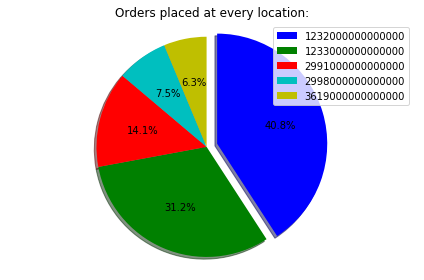

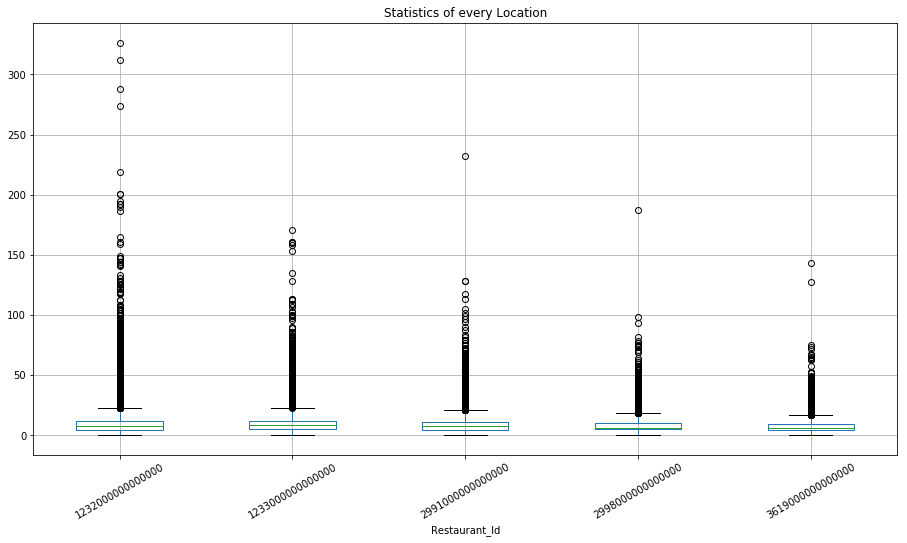

In [4]:
Stats=df['Order_Amount'].groupby(df['Restaurant_Id']).describe().round(decimals=3)
print("Statistics of the Sales for all locations are as follows:\n")
Order_Stats = Stats[['count','mean','min','max']]
display(Order_Stats)
# Piechart
colors = ['b', 'g', 'r', 'c', 'y']
labels = ['1232000000000000', '1233000000000000', '2991000000000000', '2998000000000000', '3619000000000000']
explode=(0.1, 0.00, 0.00, 0.00, 0.00)
plt.pie(Order_Stats['count'], colors=colors, explode=explode, counterclock=False, startangle=90, autopct='%1.1f%%', shadow=True)
plt.title('Orders placed at every location:')
plt.legend(labels, loc=1)
plt.axis('equal')# plot drop
plt.tight_layout()# View Plot
#Boxplot
df.boxplot(column="Order_Amount",by="Restaurant_Id", rot=30,figsize= (15,8))
plt.title("Statistics of every Location")
plt.suptitle("")
plt.show()


#### The Average Sales of items from all the Restaurant locations are in the range of 7-10 Dollars. Hence, I would rule out the possibility of a Fine Dine Restaurant . 
#### This Restaurant could be a Fast Food chain, Cafe, Bakery, Ice-cream parlour or a Quick Bites Type Restaurant. I have considered only those records where Sales are greater than 0. 

## 2. Orders and Revenue Analysis


Locations with the highest Revenue and Tips Collected:


,Order_Amount,Tip_Amount
Restaurant_Id,,
1232000000000000,927857.80,39822.93
1233000000000000,698181.59,28617.43
2991000000000000,303263.65,15999.01
2998000000000000,150519.77,8178.23
3619000000000000,111871.61,6786.61


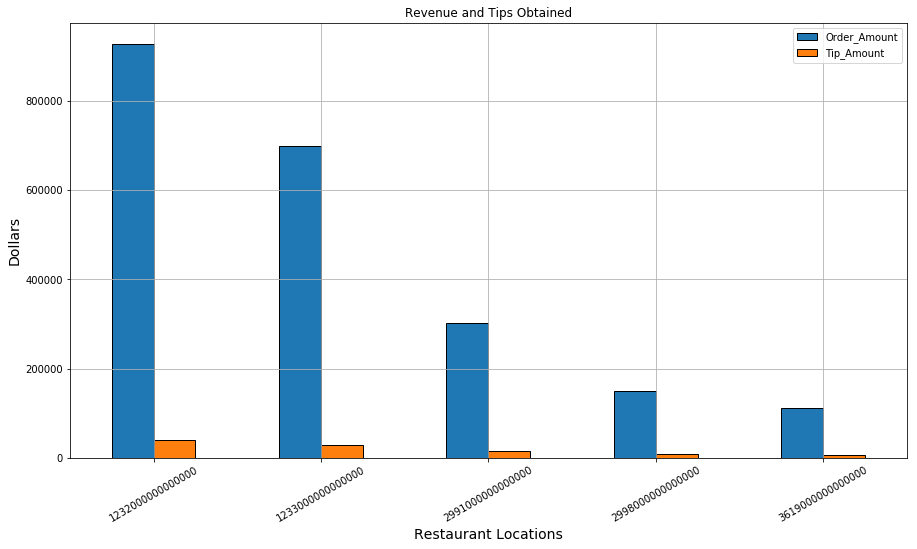

In [6]:
Revenue = df.groupby(['Restaurant_Id'])[["Order_Amount", "Tip_Amount"]].sum().sort_values('Order_Amount', ascending=False)
print("\nLocations with the highest Revenue and Tips Collected:")
display(Revenue)
plot = Revenue.plot(y=["Order_Amount", "Tip_Amount"], title="Revenue and Tips Obtained", kind="bar", grid=True, edgecolor='black', figsize=(15,8), rot=30);
plot.set_xlabel("Restaurant Locations", size=14);
plot.set_ylabel("Dollars", size=14);


Number of Orders placed by the Hour:


Restaurant_Id,1232000000000000,1233000000000000,2991000000000000,2998000000000000,3619000000000000
hour,,,,,
8,2.0,1.0,NaN,NaN,NaN
9,101.0,22.0,5.0,1.0,3.0
10,1559.0,823.0,451.0,10.0,175.0
11,3257.0,2111.0,967.0,729.0,714.0
12,4949.0,3595.0,1455.0,1189.0,1041.0
13,6022.0,5209.0,2083.0,1555.0,1142.0
14,6749.0,6114.0,2353.0,1835.0,1267.0
15,7059.0,6712.0,2347.0,1802.0,1100.0
16,6670.0,6089.0,2032.0,1762.0,1146.0


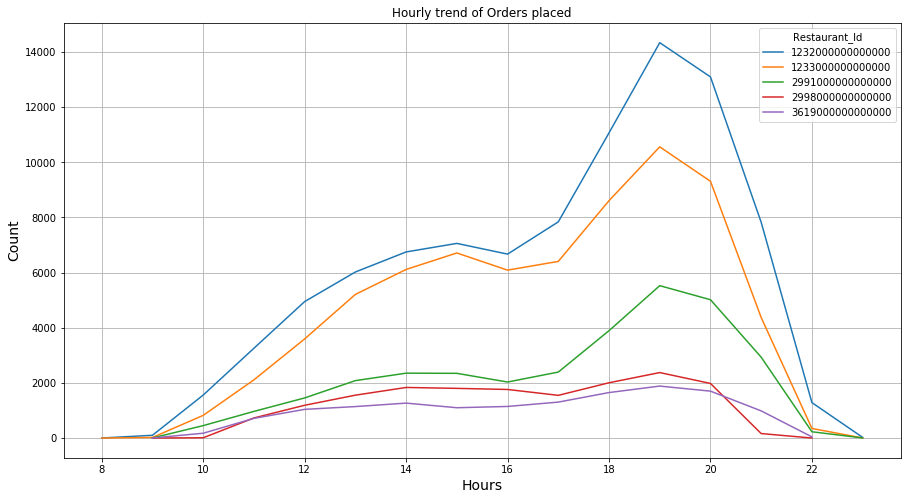

In [8]:
print("\nNumber of Orders placed by the Hour:")
df['timestamp'] =  pd.to_datetime(df['Paiddate_Timestamp']).dt.tz_localize("UTC").dt.tz_convert("EST") #Considering Restaurant Locations follow EST
df['hour']= df['timestamp'].dt.hour
orders_time = df.groupby(['Restaurant_Id', 'hour']).size().unstack('Restaurant_Id')
display(orders_time)
plot=orders_time.plot(kind='line', title="Hourly trend of Orders placed",grid=True, figsize=(15,8), stacked=False);
plot.set_xlabel("Hours", size=14);
plot.set_ylabel("Count", size=14);


Number of Orders placed by the Day:


Restaurant_Id,1232000000000000,1233000000000000,2991000000000000,2998000000000000,3619000000000000
days,,,,,
Monday,9726,7447,3531,1711,1673
Tuesday,10088,7208,4000,1913,1543
Wednesday,10654,8180,3899,1924,1926
Thursday,11202,8440,3969,2075,2053
Friday,14182,10351,4988,2880,2629
Saturday,18609,15164,5759,3519,2313
Sunday,17379,13490,5540,2934,2019


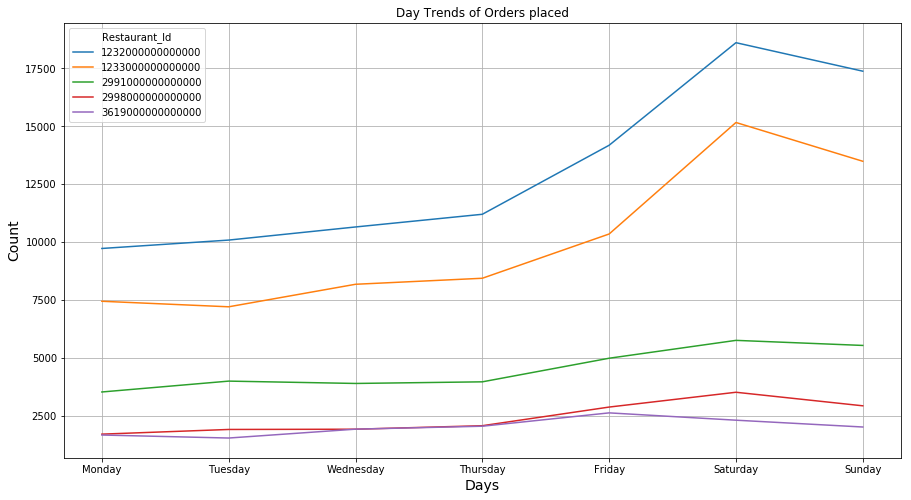

In [9]:
print("\nNumber of Orders placed by the Day:")
df['day'] = df['timestamp'].dt.strftime('%A')
labels=["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
df['days'] = pd.Categorical(df['day'], labels)
orders_day = df.groupby(['Restaurant_Id', 'days']).size().unstack('Restaurant_Id')
display(orders_day) 
plot = orders_day.plot(kind='line', title="Day Trends of Orders placed", grid=True, figsize=(15,8), stacked=False);
plt.xticks(np.arange(7), ("Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"));
plot.set_xlabel("Days", size=14);
plot.set_ylabel("Count", size=14);

#### Restaurant Locations with Highest Revenue and Tips are mentioned.
#### For the time, I converted the timestamp from GMT to EST. The Restaurant is open from 8 AM until midnight on all the days. The maximum Orders placed were between 6-8 pm. 
#### All locations of the Restaurant were most busy during weekends; busiest day being Saturday, followed by Sunday and Friday.   


Revenue Collected by the Hour:


Order_Amount                                    \
Restaurant_Id 1232000000000000 1233000000000000 2991000000000000   
hour                                                               
8                         0.02            50.00              NaN   
9                      1864.93           235.82           130.71   
10                    18264.07          9095.66          4681.49   
11                    35694.68         22087.63          9506.94   
12                    50682.77         34913.46         13145.57   
13                    63311.10         50449.76         18910.26   
14                    71273.68         59060.02         21668.84   
15                    71803.69         66399.39         23177.07   
16                    68365.83         62043.93         19976.35   
17                    81706.49         65333.31         23328.83   
18                   110996.95         88087.07         38721.20   
19                   139882.18        103660.93         52787.18   
20                   124588.74         89980.87         47325.88   
21                    76248.67         42977.37         27776.76   
22                    12878.77          3772.13          2097.20   
23                      295.23            34.24            29.37   

                                                 
Restaurant_Id 2998000000000000 3619000000000000  
hour                                             
8                          NaN              NaN  
9                         0.01            22.49  
10                       87.55          1567.00  
11                     6293.46          5487.40  
12                     9771.98          7622.55  
13                    13190.89          8758.49  
14                    15884.25          9698.70  
15                    15669.98          8893.32  
16                    15187.02          9467.09  
17                    13718.66         10334.65  
18                    18310.27         12993.74  
19                    22137.67         14797.61  
20                    18553.22         13656.10  
21                     1633.49          8150.50  
22                       81.32           421.97  
23                         NaN              NaN

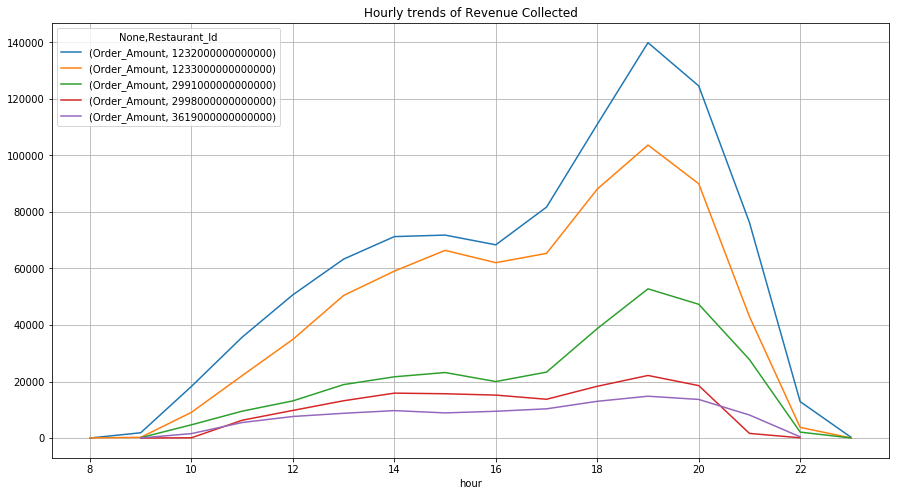

In [7]:
print("\nRevenue Collected by the Hour:")
df['hour']= df['timestamp'].dt.hour
revenue_hours = df.groupby(['Restaurant_Id', 'hour'])[["Order_Amount"]].sum().unstack('Restaurant_Id')
display(revenue_hours)
revenue_hours.plot(kind='line', title="Hourly trends of Revenue Collected",grid=True, figsize=(15,8), stacked=False);


Revenue Collected by the Day:


Order_Amount                                    \
Restaurant_Id 1232000000000000 1233000000000000 2991000000000000   
days                                                               
Monday                95708.63         70077.58         32990.81   
Tuesday               98770.30         68748.06         35669.84   
Wednesday            103473.78         77586.13         35912.57   
Thursday             107227.40         79776.72         37622.29   
Friday               146770.13        108800.22         47795.43   
Saturday             196938.09        155493.77         58239.00   
Sunday               178969.47        137699.11         55033.71   

                                                 
Restaurant_Id 2998000000000000 3619000000000000  
days                                             
Monday                14938.78         13187.83  
Tuesday               16455.68         12233.17  
Wednesday             16939.41         14631.01  
Thursday              17483.97         15557.88  
Friday                25603.15         20867.48  
Saturday              32055.85         18578.78  
Sunday                27042.93         16815.46

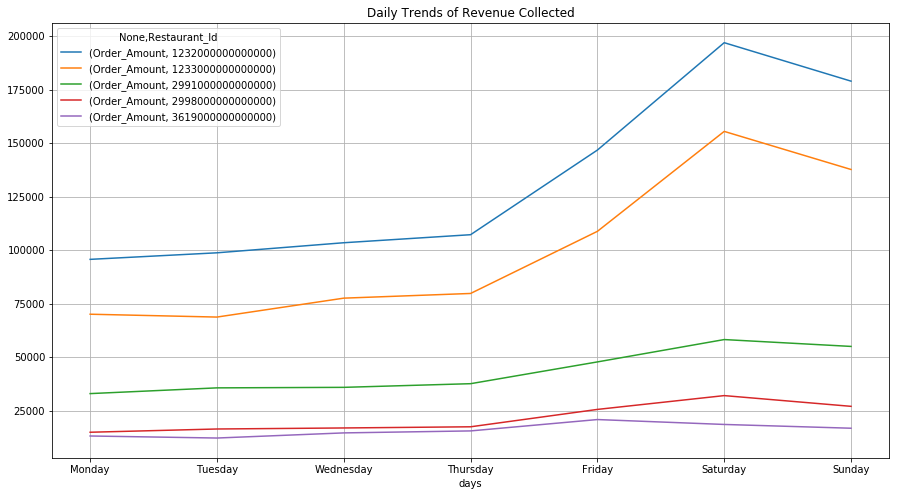

In [8]:
print("\nRevenue Collected by the Day:")
df['day'] = df['timestamp'].dt.strftime('%A')
labels=["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
df['days'] = pd.Categorical(df['day'], labels)
revenue_days = df.groupby(['Restaurant_Id', 'days'])[["Order_Amount"]].sum().unstack('Restaurant_Id')
display(revenue_days) 
revenue_days.plot(kind='line', title="Daily Trends of Revenue Collected", grid=True, figsize=(15,8), stacked=False);
plt.xticks(np.arange(7), ("Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"));

### Revenue Collected was the maximum during 6-8PM and the Saturday collected the most revenue. 


Payment Methods used for placing Orders:


Payment_Type,CASH,CREDIT,GIFTCARD
Restaurant_Id,,,
1232000000000000,30998,60610,232
1233000000000000,26414,43407,459
2991000000000000,9733,21914,39
2998000000000000,6227,10721,8
3619000000000000,4044,10093,19


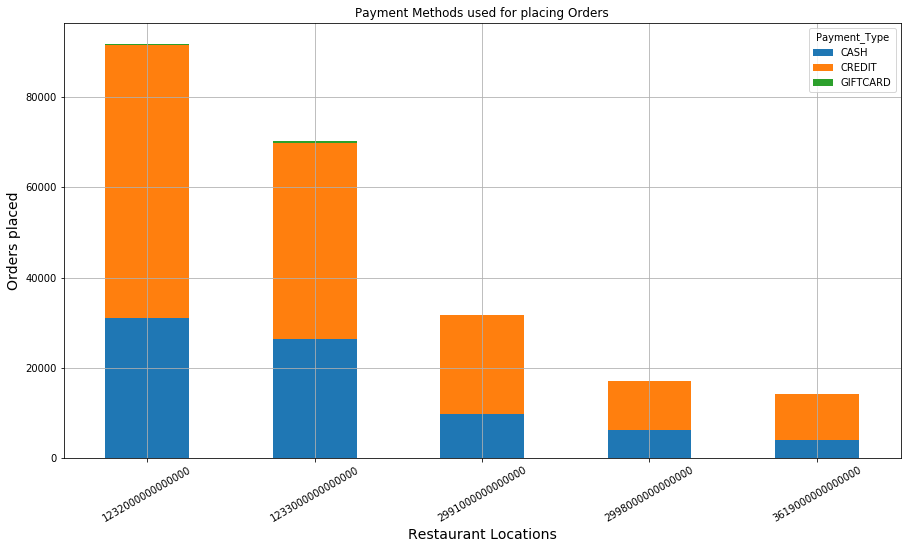

In [9]:
print("\nPayment Methods used for placing Orders:")
payment_Id_resturant= df.groupby(['Restaurant_Id', 'Payment_Type']).size().unstack('Payment_Type')
display(payment_Id_resturant)
plot=payment_Id_resturant.plot(kind='bar', grid=True, title="Payment Methods used for placing Orders", figsize=(15,8), stacked=True, rot=30);
plot.set_xlabel("Restaurant Locations", size=14);
plot.set_ylabel("Orders placed", size=14);


Revenue Collected from different Payment Types:


Order_Amount                    
Payment_Type             CASH     CREDIT GIFTCARD
Restaurant_Id                                    
1232000000000000    253520.82  672058.14  2278.84
1233000000000000    212978.86  481441.05  3761.68
2991000000000000     76861.07  226070.85   331.73
2998000000000000     48392.16  102043.87    83.74
3619000000000000     27808.10   83937.05   126.46

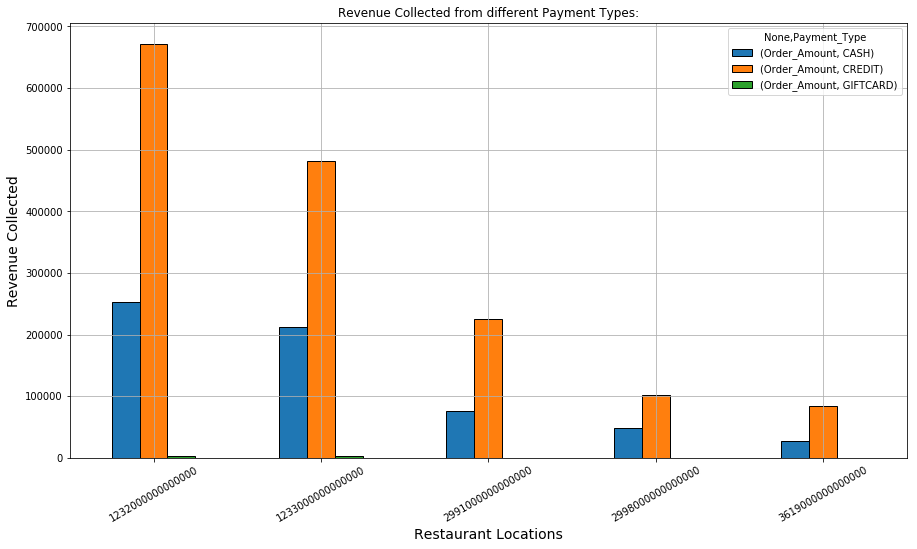

In [10]:
print("\nRevenue Collected from different Payment Types:")
payment_amount_location = df.groupby(['Payment_Type', 'Restaurant_Id'])[["Order_Amount"]].sum().unstack('Payment_Type')
display(payment_amount_location)
plot= payment_amount_location.plot(y=["Order_Amount"], kind="bar",grid=True, title="Revenue Collected from different Payment Types:", edgecolor='black', figsize=(15,8), rot=30);
plot.set_xlabel("Restaurant Locations", size=14);
plot.set_ylabel("Revenue Collected", size=14);

#### Highest Orders placed were payed by Credit Card, followed by Cash and Giftcards. Similarly, Revenue Collected were the highest from Credit, followed by Cash and Giftcards

## Server Analysis:

In [11]:
print("\nTop 5 Servers from all Locations with the Highest number of Orders Handled:\n")
Served_Orders=df.groupby(['Restaurant_Id','Server_Id']).size().reset_index(name='Served').sort_values('Served', ascending=False).head() #Orders per Location
display(Served_Orders)


Top 5 Servers from all Locations with the Highest number of Orders Handled:



,Restaurant_Id,Server_Id,Served
4,1232000000000000,1232000000000044,57468
15,1233000000000000,1233000000000035,42472
3,1232000000000000,1232000000000043,34307
14,1233000000000000,1233000000000034,27752
19,2991000000000000,2991000000000039,21371


In [12]:
print("\nChecking for Servers working at Multiple Locations")
Servers_Location = df.groupby(['Restaurant_Id','Server_Id'])[["Server_Id"]].count().unstack('Restaurant_Id')
display(Servers_Location)
print("Table shows No Server works at Multiple Locations")
print("\n\nDistinct Servers working in Every Location:\n")
served =df.groupby(['Restaurant_Id'])[['Server_Id']].nunique()
display(served)



Checking for Servers working at Multiple Locations


Server_Id                                    \
Restaurant_Id    1232000000000000 1233000000000000 2991000000000000   
Server_Id                                                             
1232000000000027             11.0              NaN              NaN   
1232000000000029              1.0              NaN              NaN   
1232000000000040              2.0              NaN              NaN   
1232000000000043          34307.0              NaN              NaN   
1232000000000044          57468.0              NaN              NaN   
1232000000000048              7.0              NaN              NaN   
1232000000003189              1.0              NaN              NaN   
1232000000034405              1.0              NaN              NaN   
1232000000081621              9.0              NaN              NaN   
1232000000088925              1.0              NaN              NaN   
1232000000095677             32.0              NaN              NaN   
1233000000000028              NaN              5.0              NaN   
1233000000000031              NaN              2.0              NaN   
1233000000000032              NaN              5.0              NaN   
1233000000000034              NaN          27752.0              NaN   
1233000000000035              NaN          42472.0              NaN   
1233000000000329              NaN             34.0              NaN   
1233000000023631              NaN             10.0              NaN   
2991000000000038              NaN              NaN          10314.0   
2991000000000039              NaN              NaN          21371.0   
2991000000000043              NaN              NaN              1.0   
2998000000000025              NaN              NaN              NaN   
2998000000000034              NaN              NaN              NaN   
2998000000000048              NaN              NaN              NaN   
2998000000000061              NaN              NaN              NaN   
2998000000000068              NaN              NaN              NaN   
2998000000002598              NaN              NaN              NaN   
3619000000000063              NaN              NaN              NaN   
3619000000000072              NaN              NaN              NaN   

                                                    
Restaurant_Id    2998000000000000 3619000000000000  
Server_Id                                           
1232000000000027              NaN              NaN  
1232000000000029              NaN              NaN  
1232000000000040              NaN              NaN  
1232000000000043              NaN              NaN  
1232000000000044              NaN              NaN  
1232000000000048              NaN              NaN  
1232000000003189              NaN              NaN  
1232000000034405              NaN              NaN  
1232000000081621              NaN              NaN  
1232000000088925              NaN              NaN  
1232000000095677              NaN              NaN  
1233000000000028              NaN              NaN  
1233000000000031              NaN              NaN  
1233000000000032              NaN              NaN  
1233000000000034              NaN              NaN  
1233000000000035              NaN              NaN  
1233000000000329              NaN              NaN  
1233000000023631              NaN              NaN  
2991000000000038              NaN              NaN  
2991000000000039              NaN              NaN  
2991000000000043              NaN              NaN  
2998000000000025              2.0              NaN  
2998000000000034              1.0              NaN  
2998000000000048              4.0              NaN  
2998000000000061          11062.0              NaN  
2998000000000068           5881.0              NaN  
2998000000002598              6.0              NaN  
3619000000000063              NaN             23.0  
3619000000000072              NaN          14133.0

Table shows No Server works at Multiple Locations


Distinct Servers working in Every Location:



,Server_Id
Restaurant_Id,
1232000000000000,11
1233000000000000,7
2991000000000000,3
2998000000000000,6
3619000000000000,2


In [13]:
print("\nTop 3 Servers from each Location, the Revenue and Tips collected by them:")
Server_Detail = df.groupby(['Restaurant_Id', 'Server_Id'])[["Order_Amount","Tip_Amount"]].sum()
Server_Detail.head()
Server_Detail = Server_Detail.groupby('Restaurant_Id').apply(lambda x: x.nlargest(3,'Order_Amount')).reset_index(level=0, drop=True)
display(Server_Detail)


Top 3 Servers from each Location, the Revenue and Tips collected by them:


Order_Amount  Tip_Amount
Restaurant_Id    Server_Id                                 
1232000000000000 1232000000000044     567214.98    24802.20
                 1232000000000043     359865.94    14994.11
                 1232000000095677        334.86       15.38
1233000000000000 1233000000000035     422333.55    17936.03
                 1233000000000034     275243.78    10661.83
                 1233000000000329        325.66       15.79
2991000000000000 2991000000000039     205491.76    11178.52
                 2991000000000038      97765.52     4820.49
                 2991000000000043          6.37        0.00
2998000000000000 2998000000000061      93738.53     4620.77
                 2998000000000068      56694.51     3556.46
                 2998000000000048         41.94        0.00
3619000000000000 3619000000000072     111694.08     6775.15
                 3619000000000063        177.53       11.46

#### Top 5 Servers with the Highest Orders Served are shown. No Server worked at mutiple locations.
#### The Servers working at every location are shown. Hence, locations are not of the same size. Some are big compared to the others and hence required more employees. 
#### The Revenue and Tip collected from Top 3 Servers from every location are shown. They could be considered valuable employees of the Restaurant, thereby offering them Better Giftcards and Loyalty Points  

## Risky Payments:


Number of Orders at the risk of not going through: 


Payment_Status                            
Payment_Status           DENIED  ERROR ERROR_NETWORK VOIDED
Restaurant_Id                                              
1232000000000000          609.0  180.0          21.0  156.0
1233000000000000          435.0  127.0          18.0  353.0
2991000000000000          112.0   14.0           NaN  149.0
2998000000000000           85.0   11.0           NaN  185.0
3619000000000000          141.0   13.0           6.0   49.0

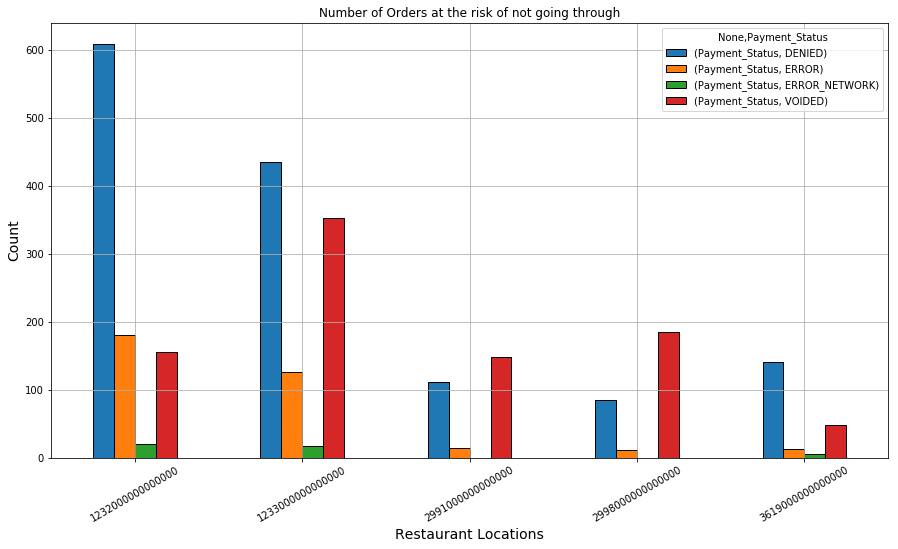

In [15]:
print("\nNumber of Orders at the risk of not going through: ")
Payment2=df.groupby(['Restaurant_Id','Payment_Status'])[["Payment_Status"]].count().unstack("Payment_Status")
Payment= Payment2.iloc[:,5:9]
display(Payment)
plot= Payment.plot(y=["Payment_Status"], kind="bar", grid=True, title="Number of Orders at the risk of not going through", edgecolor='black', figsize=(15,8), rot=30)
plot.set_xlabel("Restaurant Locations", size=14);
plot.set_ylabel("Count", size=14);

## Tip Analysis and Trends:

Tips obtained as per Payment_Methods


Tip_Amount                   
Payment_Type           CASH    CREDIT GIFTCARD
Restaurant_Id                                 
1232000000000000        0.0  39764.41    58.52
1233000000000000        0.0  28509.63   107.80
2991000000000000        0.0  15978.65    20.36
2998000000000000        0.0   8172.75     5.48
3619000000000000        0.0   6779.79     6.82

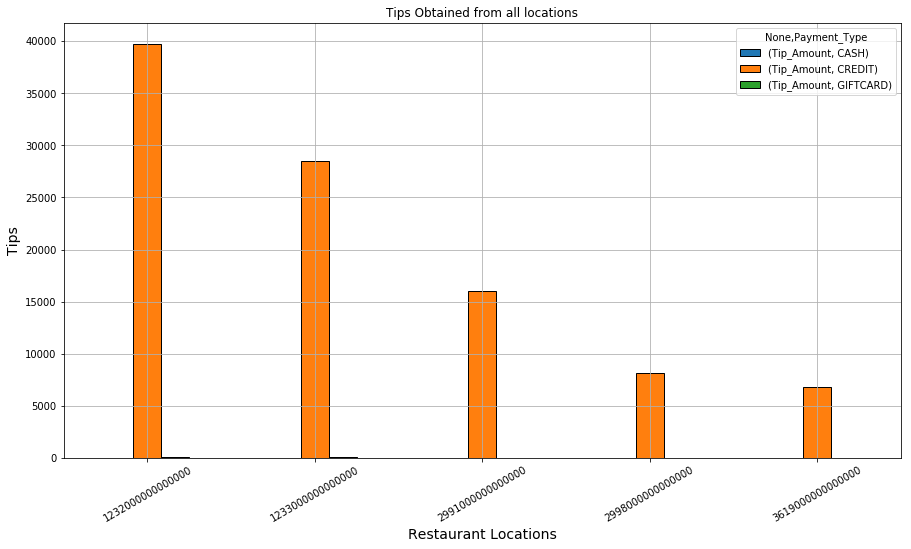

In [16]:
print("Tips obtained as per Payment_Methods")
Payment_Tip=df.groupby(['Restaurant_Id','Payment_Type'])[["Tip_Amount"]].sum().unstack("Payment_Type")
display(Payment_Tip)
plot = Payment_Tip.plot(y=["Tip_Amount"], kind="bar",grid=True, title="Tips Obtained from all locations", edgecolor='black', figsize=(15,8), rot=30);
plot.set_xlabel("Restaurant Locations", size=14);
plot.set_ylabel("Tips", size=14);


Tips Collected by the Hour:


Tip_Amount                                    \
Restaurant_Id 1232000000000000 1233000000000000 2991000000000000   
hour                                                               
8                         0.00             0.00              NaN   
9                        68.48             5.93             0.00   
10                      730.59           348.04           228.46   
11                     1419.83           813.27           509.47   
12                     2029.54          1279.90           704.09   
13                     2546.01          1897.51           934.21   
14                     2877.56          2311.86          1070.13   
15                     3120.89          2501.59          1097.10   
16                     2763.12          2395.11           870.26   
17                     3515.84          2549.66          1134.74   
18                     4789.90          3634.65          2024.15   
19                     6175.05          4641.94          2876.03   
20                     5749.06          4107.91          2713.78   
21                     3431.93          1964.17          1703.87   
22                      593.60           160.11           132.72   
23                       11.53             5.78             0.00   

                                                 
Restaurant_Id 2998000000000000 3619000000000000  
hour                                             
8                          NaN              NaN  
9                         0.00             1.78  
10                        2.00            79.54  
11                      312.28           341.98  
12                      474.10           430.07  
13                      679.48           537.15  
14                      831.87           566.53  
15                      789.22           551.94  
16                      770.75           576.61  
17                      779.92           618.94  
18                     1026.31           759.78  
19                     1261.07           902.23  
20                     1148.22           849.69  
21                      103.01           538.74  
22                        0.00            31.63  
23                         NaN              NaN

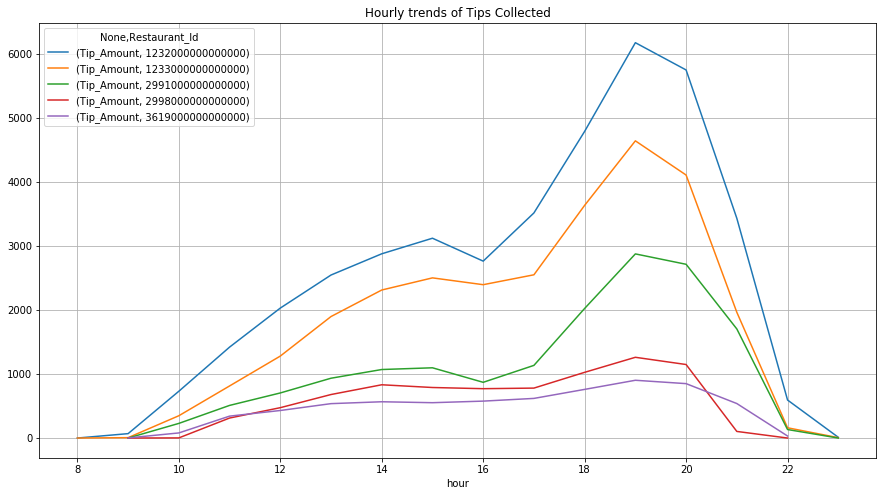

In [16]:
print("\nTips Collected by the Hour:")
df['hour']= df['timestamp'].dt.hour
tips_hours = df.groupby(['Restaurant_Id', 'hour'])[["Tip_Amount"]].sum().unstack('Restaurant_Id')
display(tips_hours)
tips_hours.plot(kind='line', title="Hourly trends of Tips Collected",grid=True, figsize=(15,8), stacked=False);


Tips Collected by the Day:


Tip_Amount                                    \
Restaurant_Id 1232000000000000 1233000000000000 2991000000000000   
days                                                               
Monday                 4409.88          2822.88          1694.07   
Tuesday                4384.11          2864.24          1818.08   
Wednesday              4521.55          3077.29          1864.85   
Thursday               4553.33          3374.54          2034.67   
Friday                 6200.13          4462.14          2551.57   
Saturday               8169.70          6329.30          3104.88   
Sunday                 7584.23          5687.04          2930.89   

                                                 
Restaurant_Id 2998000000000000 3619000000000000  
days                                             
Monday                  830.11           823.70  
Tuesday                 828.83           724.95  
Wednesday               916.77           912.91  
Thursday                966.52           931.77  
Friday                 1497.14          1298.06  
Saturday               1713.89          1101.99  
Sunday                 1424.97           993.23

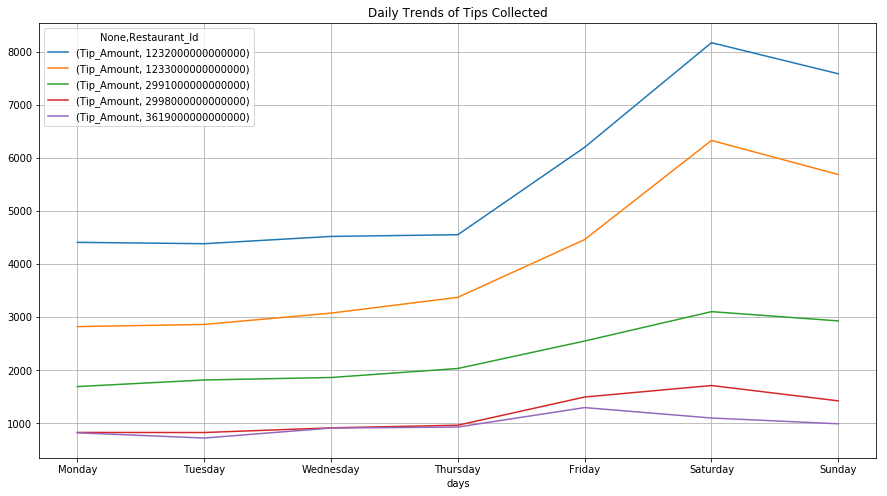

In [17]:
print("\nTips Collected by the Day:")
df['day'] = df['timestamp'].dt.strftime('%A')
labels=["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
df['days'] = pd.Categorical(df['day'], labels)
tips_days = df.groupby(['Restaurant_Id', 'days'])[["Tip_Amount"]].sum().unstack('Restaurant_Id')
display(tips_days) 
tips_days.plot(kind='line', title="Daily Trends of Tips Collected", grid=True, figsize=(15,8), stacked=False);
plt.xticks(np.arange(7), ("Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"));

#### Tips obtained from all locations when Orders are payed by Cash is 0. maximum Tips obtained were during 6-8pm and on Saturdays

## Conclusion: 

### The trends for the Restaurant are shown with respect to Restaurant Location, Server Id, Order and Tip Amount, Time(Days and Hours) Payment Method and Payment Status.

### Additional Information Needed: Server Information (Check In-Out) time, would provide some more insights.Also, Items purchased and customer details(name) could've helped with customer-order relation 

### Based on the Insights, I would consider this restaurant to be a Quick Bite or a Fast Food type restaurant, which is most busy during weekends and the busiest during 6-10 pm. It wont be a Diner since it's quiet in the mornings. The average order is in the range of 7-10 Dollars so there is very less chance of it to be a bar or a family restaurant.
